In [1]:
norm(x) = sqrt(x'*x)  ##得到模

norm (generic function with 1 method)

In [2]:
#Inexact method
#  φ(α)<= φ(0) + ϵα φ'(0)
# φ'(0) = d'*g
function search_for_alpha(f,xk,fk,d,g; α0 = 100, ϵ = 0.5,t = 0.5)
    α = α0
    φ0 = d'*g
    while f((xk .+α*d )...) > fk + ϵ*α*φ0
        α = t*α
    end
    return α
end

search_for_alpha (generic function with 1 method)

In [34]:
##可变步长的牛顿法
function Resizable_Newton(f,g,h,x0;
        ϵx=0.01,  #precision for step size
        ϵf=0.01,  #          for f
        ϵg=0.01,  #          for g
        maxIterations=128,
        debug = false
        )## f 原函数,多余，但可以用在收敛的标准 g 梯度函数 h 黑塞矩阵  x0 初始点  ϵ 收敛条件 (三个) maxIterations 防止算法进入死循环
    xk = x0
    fk = f(xk...)
    q = []
    for i in 1:maxIterations
        push!(q,xk)
        ## iteration
        ## 1 先找方向导数d
        gk = g(xk...)
         d = -inv(h(xk...))*gk     #@time
        α = search_for_alpha(f,xk,fk,d,gk,α0=1) 
        δ = α*d   #δ \delta
        xn = xk .+ δ  ##xn = x(k+1)
        fn = f(xn...)
        ## 是否满足条件 convegence？
        if (norm(δ)<= ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)    ##同时满足
            println("Convergence is reached after ",i," interation")  ##打印出进行了多少步
            return xk,fk,d,q
        end
        if debug
            println("i=",i,"\tα=",α,"\txk =",xk,"\txn=",xn,"\td = ",d,"\tδ = ",δ)
            println("fk=",fk,"\tfn=",fn)
        end
        xk = xn
        fk = fn
    end
    println("WARN:",maxIterations,"iterations have been exceeded!")
end

Resizable_Newton (generic function with 1 method)

In [35]:
xk,fk,d,q = 
Resizable_Newton(
    (x,y)->x^2+3x*y+4*y^2-x-4y,
    (x,y)->[2x+3y-1,3x+8y-4],
    (x,y)->[2 3;3 8],
    [1.,1.],
    debug = false
    )
    
    

Convergence is reached after 2 interation


([-0.571429, 0.714286], -1.1428571428571426, [-2.53765e-16, -1.26883e-16], Any[[1.0, 1.0], [-0.571429, 0.714286]])

In [36]:
q

2-element Array{Any,1}:
 [1.0, 1.0]           
 [-0.571429, 0.714286]

In [37]:
##最速下降法
function steepest_descent(f,g,x0;
        ϵx=0.01,  #precision for step size
        ϵf=0.01,  #          for f
        ϵg=0.01,  #          for g
        maxIterations=128,
        debug = false
        )## f 原函数 g 梯度函数 h 黑塞矩阵  x0 初始点  ϵ 收敛条件 (三个) maxIterations 防止算法进入死循环
    p = []
    xk = x0
    fk = f(xk...)
    for i in 1:maxIterations
        push!(p,xk)
        ## iteration
        ## 1 先找方向导数d
        d = -g(xk...)
        α = search_for_alpha(f,xk,fk,d,-d)      ##大问题分解成小问题
        δ = α*d   #δ \delta
        xn = xk .+ δ  ##xn = x(k+1)
        fn = f(xn...)
        ## 是否满足条件 convegence？
        if (norm(δ)<= ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)    ##同时满足
            println("Convergence is reached after ",i," interation")  ##打印出进行了多少步
            return xk,fk,d,p
        end
        if debug
            println("i=",i,"α=",α,"xk =",xk,"d = ",d,"δ = ",δ)
        end
        xk = xn
        fk = fn
    end
    println("WARN:",maxIterations,"iterations have been exceeded!")
end

steepest_descent (generic function with 1 method)

In [38]:
xk,fk,d,p = 
steepest_descent(
    (x,y)->x^2+3x*y+4*y^2-x-4y,
    (x,y)->[2x+3y-1,3x+8y-4],
    #(x,y)->[2 3;3 8],
    [1.,1.],
    debug = false
    )
    

Convergence is reached after 21 interation


([-0.565112, 0.711856], -1.1428396713420454, [-0.00534391, 0.000488564], Any[[1.0, 1.0], [0.609375, 0.316406], [0.381256, 0.246216], [0.283373, 0.419361], [0.122274, 0.37932], [0.0475651, 0.496238], [-0.0664668, 0.474246], [-0.123069, 0.553432], [-0.203959, 0.542055], [-0.246586, 0.595851]  …  [-0.367964, 0.66389], [-0.392939, 0.643653], [-0.506284, 0.666773], [-0.505087, 0.684807], [-0.522371, 0.699185], [-0.527528, 0.69661], [-0.554695, 0.704192], [-0.555006, 0.707175], [-0.564001, 0.713125], [-0.565112, 0.711856]])

In [54]:
p

21-element Array{Any,1}:
 [1.0, 1.0]            
 [0.609375, 0.316406]  
 [0.381256, 0.246216]  
 [0.283373, 0.419361]  
 [0.122274, 0.37932]   
 [0.0475651, 0.496238] 
 [-0.0664668, 0.474246]
 [-0.123069, 0.553432] 
 [-0.203959, 0.542055] 
 [-0.246586, 0.595851] 
 [-0.304082, 0.590568] 
 [-0.367964, 0.66389]  
 [-0.392939, 0.643653] 
 [-0.506284, 0.666773] 
 [-0.505087, 0.684807] 
 [-0.522371, 0.699185] 
 [-0.527528, 0.69661]  
 [-0.554695, 0.704192] 
 [-0.555006, 0.707175] 
 [-0.564001, 0.713125] 
 [-0.565112, 0.711856] 

In [44]:
function ConjugateGradientFSO(f, g, h, x0; 
        ϵx=0.01, # precision for step size
        ϵf=0.01, 
        ϵg=0.01, 
        debug=false)
    #check arguments
    n, m=size(h)
    if n≠m
        error("ERROR: Matrix H is not square!")
    end
    steps=[]
    maxIterations = n
    xk = x0
    fk = f(xk...)
    gk = g(xk...)
    dk = -gk
    dh = dk'*h*dk
    α =  -dk'*gk/dh
    δ =  α .*dk
    #xn = xk .+ δ
    #fn = f(xn...)
    #gn = g(xn...)
    push!(steps, xk)
    if (norm(gk)<=ϵg)
        println("Convergence is reached after 1 iteration.")
        return xk, fk, gk, steps
    end
    for i in 1:maxIterations
        # iteration
        xn = xk .+ δ
        push!(steps, xn)
        fn = f(xn...)
        gn = g(xn...)
        βn = dk'*h*gn/dh
        dn = -gn .+ βn.*dk
        dh = dn'*h*dn
        α  = -dn'*gn/dh
        δ  = α.*dn       
        # convegence?
        if (norm(gn)<=ϵg)
            println("Convergence is reached after ", i, " iterations.")
            return xn, fn, gn, steps
        end
        xk = xn
        fk = fn
        dk = dn
        if debug
            println("i=",i," x=", xn, " α=", α, " β=", βn, " gn=", gn, " d=", dn, " δ= ",δ)
        end
    end
    #println("WARN:", maxIterations, " iterations have been exceeded!")
end

ConjugateGradientFSO (generic function with 1 method)

In [46]:
xn,fn,gn,steps = 
ConjugateGradientFSO(
    (x,y)->x^2+3x*y+4*y^2-x-4y,
    (x,y)->[2x+3y-1,3x+8y-4],
    [2 3;3 8],
    [1.,1.],
    debug = false
    )
    

Convergence is reached after 2 iterations.


([-0.571429, 0.714286], -1.1428571428571428, [-8.88178e-16, -1.33227e-15], Any[[1.0, 1.0], [0.560811, 0.231419], [-0.571429, 0.714286]])

In [55]:
steps

3-element Array{Any,1}:
 [1.0, 1.0]           
 [0.560811, 0.231419] 
 [-0.571429, 0.714286]

In [50]:
##牛顿法  收敛速度非常快，但是计算量非常大
function Newton(f,g,h,x0;
        ϵx=0.01,  #precision for step size
        ϵf=0.01,  #          for f
        ϵg=0.01,  #          for g
        maxIterations=128,
        debug = false
        )## f 原函数,多余，但可以用在收敛的标准 g 梯度函数 h 黑塞矩阵  x0 初始点  ϵ 收敛条件 (三个) maxIterations 防止算法进入死循环
    xk = x0
    fk = f(xk...)
    a = []
    for i in 1:maxIterations
        push!(a,xk)
        ## iteration
        ## 1 先找方向导数d
         d = -inv(h(xk...))*g(xk...)     #@time
        α = 1
        δ = α*d   #δ \delta
        xn = xk .+ δ  ##xn = x(k+1)
        fn = f(xn...)
        ## 是否满足条件 convegence？
        if (norm(δ)<= ϵx)&&(abs(fn-fk)<=ϵf)&&(norm(d)<=ϵg)    ##同时满足
            println("Convergence is reached after ",i," interation")  ##打印出进行了多少步
            return xk,fk,d,a
        end
        if debug
            println("i=",i,"α=",α,"xk =",xk,"\txn=",xn,"d = ",d,"δ = ",δ)
            println("fk=",fk,"\tfn=",fn)
        end
        xk = xn
        fk = fn
    end
    println("WARN:",maxIterations,"iterations have been exceeded!")
end

Newton (generic function with 1 method)

In [51]:
xk,fk,d,a = 
Newton(
    (x,y)->x^2+3x*y+4*y^2-x-4y,
    (x,y)->[2x+3y-1,3x+8y-4],
    (x,y)->[2 3;3 8],
    [1.,1.],
    debug = false
    )
    

Convergence is reached after 2 interation


([-0.571429, 0.714286], -1.1428571428571426, [-2.53765e-16, -1.26883e-16], Any[[1.0, 1.0], [-0.571429, 0.714286]])

In [52]:
a

2-element Array{Any,1}:
 [1.0, 1.0]           
 [-0.571429, 0.714286]

In [53]:
using Gadfly

In [56]:
#可变步长牛顿法
scatter1=
layer(x=[ q[i][1] for i in 1:length(q)],
y=[ q[i][2] for i in 1:length(q)],
   label=[ string(i) for i in 1:length(q)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"yellow"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.714286],:label=>["1", "2"],:x=>[1.0, -0.571429]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(1.0,1.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','Helvetica Neue','Hel

In [57]:
#最速下降法
scatter2=
layer(x=[ p[i][1] for i in 1:length(p)],
y=[ p[i][2] for i in 1:length(p)],
   label=[ string(i) for i in 1:length(p)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"blue"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.316406, 0.246216, 0.419361, 0.37932, 0.496238, 0.474246, 0.553432, 0.542055, 0.595851  …  0.66389, 0.643653, 0.666773, 0.684807, 0.699185, 0.69661, 0.704192, 0.707175, 0.713125, 0.711856],:label=>["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"  …  "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"],:x=>[1.0, 0.609375, 0.381256, 0.283373, 0.122274, 0.0475651, -0.0664668, -0.123069, -0.203959, -0.246586  …  -0.367964, -0.392939, -0.506284, -0.505087, -0.522371, -0.527528, -0.554695, -0.555006, -0.564001, -0.565112]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(0.0,0.0,1.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Floa

In [58]:
#共轭梯度法
scatter3=
layer(x=[ steps[i][1] for i in 1:length(steps)],
y=[ steps[i][2] for i in 1:length(steps)],
   label=[ string(i) for i in 1:length(steps)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"red"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.231419, 0.714286],:label=>["1", "2", "3"],:x=>[1.0, 0.560811, -0.571429]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(1.0,0.0,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sa

In [59]:
#牛顿法
scatter4=
layer(x=[ a[i][1] for i in 1:length(a)],
y=[ a[i][2] for i in 1:length(a)],
   label=[ string(i) for i in 1:length(a)],
Geom.point,Geom.line,Geom.label,Theme(default_color=colorant"orange"))

3-element Array{Layer,1}:
 Layer(nothing, Dict{Symbol,Any}(:y=>[1.0, 0.714286],:label=>["1", "2"],:x=>[1.0, -0.571429]), Gadfly.StatisticElement[], Gadfly.Geom.PointGeometry(Symbol("")), Theme(RGB{N0f8}(1.0,0.647,0.0), 0.9mm, 0.45mm, 1.8mm, Function[circle, square, diamond, cross, xcross, utriangle, dtriangle, star1, star2, hexagon, octagon, hline, vline], 0.3mm, Symbol[:solid, :dash, :dot, :dashdot, :dashdotdot, :ldash, :ldashdash, :ldashdot, :ldashdashdot], nothing, nothing, 0.0, nothing, Measures.Length{:mm,Float64}[5.0mm], RGB{N0f8}(0.816,0.816,0.878), Measures.Length{:mm,Float64}[0.5mm, 0.5mm], RGB{N0f8}(0.627,0.627,0.627), 0.2mm, "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.424,0.376,0.42), "'PT Sans','Helvetica Neue','Helvetica',sans-serif", 3.880555555555555mm, RGB{N0f8}(0.337,0.29,0.333), "'PT Sans Caption','Helvetica Neue','Helvetica',sans-serif", 2.822222222222222mm, RGB{N0f8}(0.298,0.251,0.294), "'PT Sans','Helvetica Neue','H

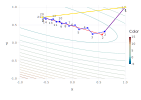

In [60]:
fun=layer((x,y)->x^2+3x*y+4*y^2-x-4y, -1, 1, -1, 1);
plot(fun,scatter1,scatter2,scatter3,scatter4)